In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# 1: Implement lại các loss và r_squared bằng numpy

In [ ]:
def mse(y_true: np.array, y_pred: np.array):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true: np.array, y_pred: np.array):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def mae(y_true: np.array, y_pred: np.array):
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true: np.array, y_pred: np.array):
    return np.mean(np.abs((y_true - y_pred)/y_true))


In [ ]:
# Các bạn có thể thử với dữ liệu ở đây
a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))
print('\n\n')

1.0
1.0
0.6
0.26666666666666666





In [ ]:
# result: 

a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))

1.0
1.0
0.6
0.26666666666666666


# 2: Implement lại Ridge Regression

In [ ]:
class RidgeRegression:
    def __init__(self, _lambda = 0.1):
        self._lambda = _lambda
        
    
    def fit(self, X, y):
        try: 
            X.shape[1]
        except: 
            X = X.reshape(X.shape[0], 1)
        N = X.shape[0]
        d = X.shape[1]
        ones  = np.ones((N,1))
        X_bar = np.concatenate((ones, X), axis = 1)
        I  = np.identity((d+1))
        I[0][0] =  0
        A = np.linalg.inv(np.dot(X_bar.T, X_bar) + self._lambda*I)
        B = np.dot(X_bar.T, y)
        self.theta =  np.dot(A, B)
        print(f'The intercept is: ', self.theta[0])
        print(f'The slope is: ', self.theta[1:])
        return self.theta

    def predict(self, X_test):
        ones = np.ones((X_test.shape[0], 1))
        try: 
            X_test.shape[1]
        except: 
            X_test = X_test.reshape(X_test.shape[0], 1)
        X_test_bar = np.concatenate((ones, X_test), axis=1)
        y_pred = np.dot(X_test_bar, self.theta)
        return y_pred

# 3: Tạo dữ liệu toy_data

In [ ]:
def func(x):
    return np.sin(2 * np.pi * x)

def create_toy_data(func = func, sample_size=100, standard_deviation=0.25):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=standard_deviation, size=x.shape)
    return x, t


In [ ]:
import pandas as pd
np.random.seed(10)
data = create_toy_data()
X = data[0]
y = data[1]
df = pd.DataFrame({
                   'x': X,
                   'x^2': X**2,
                   'x^3': X**3,
                   'x^4': X**4,
                   'x^5': X**5,
                   'x^6': X**6,
                   'x^7': X**7,
                   'x^8': X**8,
                   'x^9': X**9,
                   'y': y}, 
                    columns=['x', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7', 'x^8', 'x^9', 'y'])

# df is the original dataset
df

x       x^2       x^3           x^4           x^5           x^6  \
0   0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
1   0.010101  0.000102  0.000001  1.041020e-08  1.051536e-10  1.062157e-12   
2   0.020202  0.000408  0.000008  1.665633e-07  3.364914e-09  6.797807e-11   
3   0.030303  0.000918  0.000028  8.432265e-07  2.555232e-08  7.743127e-10   
4   0.040404  0.001632  0.000066  2.665012e-06  1.076773e-07  4.350596e-09   
..       ...       ...       ...           ...           ...           ...   
95  0.959596  0.920824  0.883619  8.479176e-01  8.136583e-01  7.807832e-01   
96  0.969697  0.940312  0.911818  8.841871e-01  8.573935e-01  8.314119e-01   
97  0.979798  0.960004  0.940610  9.216078e-01  9.029895e-01  8.847473e-01   
98  0.989899  0.979900  0.970002  9.602040e-01  9.505050e-01  9.409039e-01   
99  1.000000  1.000000  1.000000  1.000000e+00  1.000000e+00  1.000000e+00   

             x^7           x^8           x^9         y  
0   0.000000e+00  0.000000e+00  0.000000e+00  0.332897  
1   1.072886e-14  1.083723e-16  1.094670e-18  0.242244  
2   1.373294e-12  2.774332e-14  5.604711e-16 -0.259758  
3   2.346402e-11  7.110309e-13  2.154639e-14  0.187155  
4   1.757817e-10  7.102290e-12  2.869612e-13  0.406482  
..           ...           ...           ...       ...  
95  7.492364e-01  7.189642e-01  6.899152e-01 -0.021581  
96  8.062176e-01  7.817868e-01  7.580962e-01 -0.309775  
97  8.668736e-01  8.493610e-01  8.322022e-01 -0.104196  
98  9.313999e-01  9.219918e-01  9.126787e-01  0.143326  
99  1.000000e+00  1.000000e+00  1.000000e+00 -0.488628  

[100 rows x 10 columns]

In [ ]:
# Train set is 10 observations randomly choiced from the original dataset.
train = df.sample(10, random_state= 10)
train

x       x^2       x^3           x^4           x^5           x^6  \
19  0.191919  0.036833  0.007069  1.356668e-03  2.603707e-04  4.997013e-05   
14  0.141414  0.019998  0.002828  3.999184e-04  5.655411e-05  7.997552e-06   
43  0.434343  0.188654  0.081941  3.559041e-02  1.545846e-02  6.714282e-03   
37  0.373737  0.139680  0.052203  1.951040e-02  7.291765e-03  2.725205e-03   
66  0.666667  0.444444  0.296296  1.975309e-01  1.316872e-01  8.779150e-02   
3   0.030303  0.000918  0.000028  8.432265e-07  2.555232e-08  7.743127e-10   
79  0.797980  0.636772  0.508131  4.054783e-01  3.235635e-01  2.581971e-01   
41  0.414141  0.171513  0.071031  2.941675e-02  1.218269e-02  5.045358e-03   
38  0.383838  0.147332  0.056552  2.170669e-02  8.331861e-03  3.198088e-03   
68  0.686869  0.471789  0.324057  2.225845e-01  1.528863e-01  1.050128e-01   

             x^7           x^8           x^9         y  
19  9.590226e-06  1.840548e-06  3.532366e-07  0.664197  
14  1.130967e-06  1.599347e-07  2.261703e-08  0.833304  
43  2.916304e-03  1.266678e-03  5.501731e-04  0.278596  
37  1.018511e-03  3.806556e-04  1.422652e-04  0.628286  
66  5.852766e-02  3.901844e-02  2.601229e-02 -0.604480  
3   2.346402e-11  7.110309e-13  2.154639e-14  0.187155  
79  2.060361e-01  1.644126e-01  1.311980e-01 -1.154404  
41  2.089492e-03  8.653450e-04  3.583752e-04  0.425959  
38  1.227549e-03  4.711804e-04  1.808571e-04  0.980887  
68  7.213002e-02  4.954385e-02  3.403012e-02 -1.012979

In [ ]:
# Validation dataset is the rest of the original dataset after excluding the train set .

rest = df[~df.isin(train)].dropna()

# Randomly choice 10 observations into val_1 set

val_1 = rest.sample(10, random_state = 10)
val_1


x       x^2       x^3       x^4           x^5           x^6  \
86  0.868687  0.754617  0.655526  0.569447  4.946708e-01  4.297140e-01   
29  0.292929  0.085808  0.025136  0.007363  2.156821e-03  6.317959e-04   
4   0.040404  0.001632  0.000066  0.000003  1.076773e-07  4.350596e-09   
40  0.404040  0.163249  0.065959  0.026650  1.076773e-02  4.350596e-03   
22  0.222222  0.049383  0.010974  0.002439  5.419228e-04  1.204273e-04   
16  0.161616  0.026120  0.004221  0.000682  1.102615e-04  1.782004e-05   
44  0.444444  0.197531  0.087791  0.039018  1.734153e-02  7.707347e-03   
77  0.777778  0.604938  0.470508  0.365950  2.846280e-01  2.213773e-01   
45  0.454545  0.206612  0.093914  0.042688  1.940379e-02  8.819905e-03   
24  0.242424  0.058770  0.014247  0.003454  8.372984e-04  2.029814e-04   

             x^7           x^8           x^9         y  
86  3.732869e-01  3.242695e-01  2.816886e-01 -0.746799  
29  1.850715e-04  5.421287e-05  1.588054e-05  1.117143  
4   1.757817e-10  7.102290e-12  2.869612e-13  0.406482  
40  1.757817e-03  7.102290e-04  2.869612e-04  0.732118  
22  2.676162e-05  5.947027e-06  1.321561e-06  1.051325  
16  2.880007e-06  4.654556e-07  7.522516e-08  0.565575  
44  3.425487e-03  1.522439e-03  6.766395e-04  0.140872  
77  1.721824e-01  1.339196e-01  1.041597e-01 -0.829658  
45  4.009048e-03  1.822294e-03  8.283157e-04  0.228558  
24  4.920762e-05  1.192912e-05  2.891908e-06  1.279790

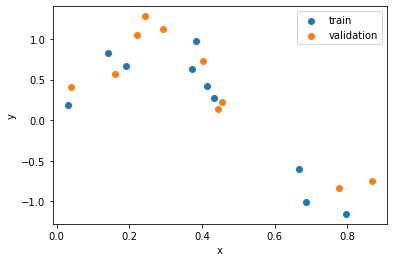

In [ ]:
# Plotting 

plt.scatter(train.iloc[:, 0], train.iloc[:, -1])
plt.scatter(val_1.iloc[:, 0], val_1.iloc[:, -1])
plt.legend(['train', 'validation'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 3b: Lần lượt fit các model đa thức bậc 0, 1, 2,...,9

# 3c: Với mỗi mô hình, tính loss train/val và nhận xét xem mô hình bị overfitting hay underfitting.

In [ ]:
# ====== Fit Ridge Regression Model with only intercept (degree 0) ==== 

X_train =  train.iloc[:, 0:0].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:0].values
y_val = val_1.iloc[:, -1].values

# == Fit model from scratch == 

Ridge1 = RidgeRegression()
Ridge_1 = Ridge1.fit(X_train, y_train)
print('\n')

# == Predict on train set ==
y_pred_on_train = Ridge1.predict(X_train)
print(f'Predict y on training set: ', y_pred_on_train)
print('\n')

# == Predict on validation set ==

y_pred_on_val =  Ridge1.predict(X_val)
# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))


The intercept is:  0.12265214956434392
The slope is:  []


Predict y on training set:  [0.12265215 0.12265215 0.12265215 0.12265215 0.12265215 0.12265215
 0.12265215 0.12265215 0.12265215 0.12265215]


RMSE on training set: 0.7321377203002895
RMSE on validation set: 0.742495160889299


In [ ]:
# ====== Fit Ridge Regression Model with degree of 1 ==== 
# ======= Implement from scratch ========
print('Ridge Regression Model with degree of 1')


# == Prepare the data == 
X_train =  train.iloc[:, 0:1].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:1].values
y_val = val_1.iloc[:, -1].values

# == Fit model from scratch == 

Ridge1 = RidgeRegression()
Ridge_1 = Ridge1.fit(X_train, y_train)
print('\n')

# == Predict on train set ==
y_pred_on_train = Ridge1.predict(X_train)
print(f'Predict y on training set: ', y_pred_on_train)
print('\n')

# == Predict on validation set ==

y_pred_on_val =  Ridge1.predict(X_val)
# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))


Ridge Regression Model with degree of 1
The intercept is:  0.9760993756228193
The slope is:  [-2.07086459]


Predict y on training set:  [ 0.57866072  0.68324984  0.07663294  0.20213988 -0.40447702  0.9133459
 -0.67640873  0.11846858  0.18122206 -0.44631267]


RMSE on training set: 0.45860459734786807
RMSE on validation set: 0.4665523860529358


**So sánh kết quả với thư viện sklearn**

In [ ]:
# Implement with SKlearn

X_train =  train.iloc[:, 0:1].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:1].values
y_val = val_1.iloc[:, -1].values

from sklearn.linear_model import Ridge

Ridge = Ridge(alpha = 0.1)
Ridge.fit(X_train, y_train)

print('Ridge Regression Model with degree of 1')
print('\n')
print('The intercept:', Ridge.intercept_)
print('The slope:', Ridge.coef_)
print('Predict on training set:', Ridge.predict(X_train))
print('RMSE on training set: ', np.sqrt(mean_squared_error(y_true = y_train, y_pred = Ridge.predict(X_train))))
print('RMSE on validation set: ', np.sqrt(mean_squared_error(y_true = y_val, y_pred = Ridge.predict(X_val))))

Ridge Regression Model with degree of 1


The intercept: 0.9760993756228187
The slope: [-2.07086459]
Predict on training set: [ 0.57866072  0.68324984  0.07663294  0.20213988 -0.40447702  0.9133459
 -0.67640873  0.11846858  0.18122206 -0.44631267]
RMSE on training set:  0.4586045973478682
RMSE on validation set:  0.46655238605293586


In [ ]:
# ====== Fit Ridge Regression Model with degree of 2 ==== 
# ======= Implement from scratch ========
print('Ridge Regression Model with degree of 2')


# == Prepare the data == 
X_train =  train.iloc[:, 0:2].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:2].values
y_val = val_1.iloc[:, -1].values

# == Fit model from scratch == 

Ridge2 = RidgeRegression()
Ridge_2 = Ridge2.fit(X_train, y_train)
print('\n')

# == Predict on train set ==
y_pred_on_train = Ridge2.predict(X_train)
print(f'Predict y on training set: ', y_pred_on_train)
print('\n')

# == Predict on validation set ==

y_pred_on_val =  Ridge2.predict(X_val)
# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))


Ridge Regression Model with degree of 2
The intercept is:  0.8378546320063053
The slope is:  [-0.6159413  -2.04328488]


Predict y on training set:  [ 0.64438341  0.70989029  0.18485026  0.32224908 -0.48089951  0.81731345
 -0.95476019  0.23231769  0.30039167 -0.54921466]


RMSE on training set: 0.3586012029598824
RMSE on validation set: 0.42077986693670605


In [ ]:
# Implement 2-degree polynomial Ridge Regression model with SKlearn

X_train =  train.iloc[:, 0:2].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:2].values
y_val = val_1.iloc[:, -1].values

from sklearn.linear_model import Ridge

Ridge = Ridge(alpha = 0.1)
Ridge.fit(X_train, y_train)

print('Ridge Regression Model with degree of 2')
print('\n')
print('The intercept:', Ridge.intercept_)
print('The slope:', Ridge.coef_)
print('Predict on training set:', Ridge.predict(X_train))
print('RMSE on training set: ', np.sqrt(mean_squared_error(y_true = y_train, y_pred = Ridge.predict(X_train))))
print('RMSE on validation set: ', np.sqrt(mean_squared_error(y_true = y_val, y_pred = Ridge.predict(X_val))))

Ridge Regression Model with degree of 2


The intercept: 0.8378546320063051
The slope: [-0.6159413  -2.04328488]
Predict on training set: [ 0.64438341  0.70989029  0.18485026  0.32224908 -0.48089951  0.81731345
 -0.95476019  0.23231769  0.30039167 -0.54921466]
RMSE on training set:  0.3586012029598823
RMSE on validation set:  0.42077986693670594


**Tương tự với các bậc cao hơn**

In [ ]:
for i in range(10):
    RidgeModel = RidgeRegression()
    print(f'Model bậc', i)
    # Prepare the data
    X_train = train.iloc[:, 0:i].values
    y_train = train.iloc[:, -1].values
    X_val = val_1.iloc[:, 0:i].values
    y_val = val_1.iloc[:, -1].values
    # Fit data
    RidgeModel.fit(X_train, y_train)
    # Prediction on training set: 
    y_pred_on_train_set = RidgeModel.predict(X_train)
    # Prediction on validation set: 
    y_pred_on_val_set = RidgeModel.predict(X_val)
    # Calculate RMSE: 
    print('RMSE on training set:', rmse(y_true = y_train, y_pred = y_pred_on_train_set))
    print('RMSE on validation set:', rmse(y_true =  y_val, y_pred = y_pred_on_val_set))
    print('\n')

Model bậc 0
The intercept is:  0.12265214956434392
The slope is:  []
RMSE on training set: 0.7321377203002895
RMSE on validation set: 0.742495160889299


Model bậc 1
The intercept is:  0.9760993756228193
The slope is:  [-2.07086459]
RMSE on training set: 0.45860459734786807
RMSE on validation set: 0.4665523860529358


Model bậc 2
The intercept is:  0.8378546320063053
The slope is:  [-0.6159413  -2.04328488]
RMSE on training set: 0.3586012029598824
RMSE on validation set: 0.42077986693670605


Model bậc 3
The intercept is:  0.7593170693746597
The slope is:  [-0.27391313 -1.41128016 -1.46501489]
RMSE on training set: 0.3177313286383517
RMSE on validation set: 0.4392472146428353


Model bậc 4
The intercept is:  0.7261141599138563
The slope is:  [-0.19150747 -1.18053119 -1.20175831 -0.96102868]
RMSE on training set: 0.30578630635497
RMSE on validation set: 0.466364341234571


Model bậc 5
The intercept is:  0.7126274049055719
The slope is:  [-0.17269608 -1.09188973 -1.09202985 -0.85402303 -

**Bậc càng cao thì RMSE trên training set càng thấp ---> fit data tốt hơn.
Tuy nhiên RMSE trên validation test tăng ----> khả năng generalize ko tốt**

# 3d: visualize model với đa thức bậc 1, 3, 6, 9

The intercept is:  0.12265214956434392
The slope is:  []


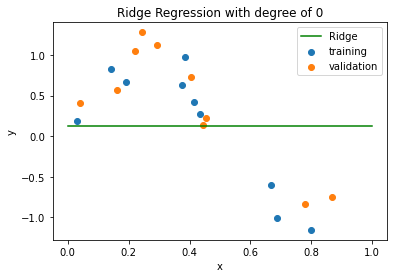

In [ ]:
# plot bac 0:
   
X_train = train.iloc[:, 0:0].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:0].values
y_val = val_1.iloc[:, -1].values

Ridge = RidgeRegression()
w = Ridge.fit(X_train, y_train)

x = np.linspace(0,1)
y =  w[0] + 0*x 

plt.scatter(train.iloc[:, 0].values, y_train, label = 'training')
plt.scatter(val_1.iloc[:, 0].values, y_val, label = 'validation')
plt.plot(x,y, label = 'Ridge', color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression with degree of 0')
plt.legend()
plt.show()

The intercept is:  0.7593170693746597
The slope is:  [-0.27391313 -1.41128016 -1.46501489]


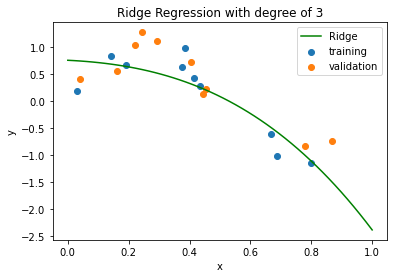

In [ ]:
# plot bac 3 :
    
X_train = train.iloc[:, 0:3].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:3].values
y_val = val_1.iloc[:, -1].values

Ridge = RidgeRegression()
w = Ridge.fit(X_train, y_train)

x = np.linspace(0,1)
y =  w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

plt.scatter(train.iloc[:, 0].values, y_train, label = 'training')
plt.scatter(val_1.iloc[:, 0].values, y_val, label = 'validation')
plt.plot(x,y, label = 'Ridge', color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression with degree of 3')
plt.legend()
plt.show()

The intercept is:  0.7072123078772219
The slope is:  [-0.16958952 -1.05689168 -1.04538682 -0.80669527 -0.56473771 -0.37430521]


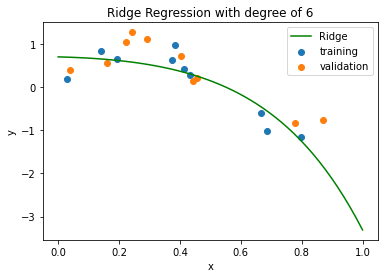

In [ ]:
# plot bac 6 :
    
X_train = train.iloc[:, 0:6].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:6].values
y_val = val_1.iloc[:, -1].values

Ridge = RidgeRegression()
w = Ridge.fit(X_train, y_train)

x = np.linspace(0,1)
y =  w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4 +  w[5]*x**5 +  w[6]*x**6

plt.scatter(train.iloc[:, 0].values, y_train, label = 'training')
plt.scatter(val_1.iloc[:, 0].values, y_val, label = 'validation')
plt.plot(x,y, label = 'Ridge', color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression with degree of 6')
plt.legend()
plt.show()

The intercept is:  0.7039739343290041
The slope is:  [-0.17112097 -1.03569601 -1.01416121 -0.77332257 -0.53301008 -0.34581533
 -0.2133553  -0.12438238 -0.06675894]


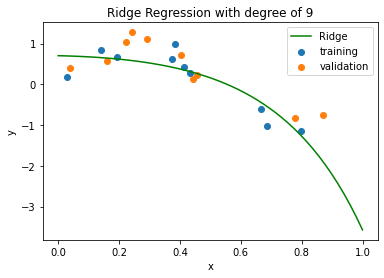

In [ ]:
# plot bac 6 :
    
X_train = train.iloc[:, 0:9].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:9].values
y_val = val_1.iloc[:, -1].values

Ridge = RidgeRegression()
w = Ridge.fit(X_train, y_train)

x = np.linspace(0,1)
y =  w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4 +  w[5]*x**5 +  w[6]*x**6 + w[7]*x**7 + w[8]*x**8 + w[9]*x**9

plt.scatter(train.iloc[:, 0].values, y_train, label = 'training')
plt.scatter(val_1.iloc[:, 0].values, y_val, label = 'validation')
plt.plot(x,y, label = 'Ridge', color = 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression with degree of 9')
plt.legend()
plt.show()

The intercept is:  0.12265214956434392
The slope is:  []
The intercept is:  0.7593170693746597
The slope is:  [-0.27391313 -1.41128016 -1.46501489]
The intercept is:  0.7072123078772219
The slope is:  [-0.16958952 -1.05689168 -1.04538682 -0.80669527 -0.56473771 -0.37430521]
The intercept is:  0.7039739343290041
The slope is:  [-0.17112097 -1.03569601 -1.01416121 -0.77332257 -0.53301008 -0.34581533
 -0.2133553  -0.12438238 -0.06675894]


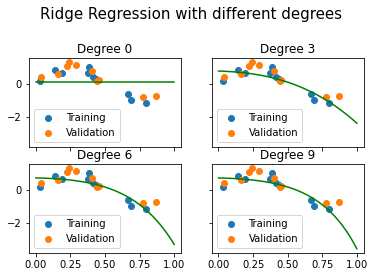

In [ ]:
# x_upper = 1 
# x_lower = -1 
# y_upper = 1
# y_lower = -1

x_0 = train.iloc[:, 0].values
y_0 = train.iloc[:, -1].values
x_1 = val_1.iloc[:, 0].values
y_1 = val_1.iloc[:, -1].values

fig, axs = plt.subplots(2, 2, sharex = True, sharey = True)

axs[0,0].set_title('Degree 0')
axs[0,1].set_title('Degree 3')
axs[1,0].set_title('Degree 6')
axs[1,1].set_title('Degree 9')

fig.suptitle('Ridge Regression with different degrees', size = 15)
fig.subplots_adjust(top=0.8)

for n, ax in enumerate(axs.flatten()):
    ax.scatter(x_0, y_0, label = 'Training')
    ax.scatter(x_1, y_1, label = 'Validation')
    ax.legend(['Training', 'Validation'])
    
# Degree 0: 

X_train = train.iloc[:, 0:0].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:0].values
y_val = val_1.iloc[:, -1].values
Ridge = RidgeRegression()
w = Ridge.fit(X_train, y_train)
x = np.linspace(0,1)
y =  w[0] + 0*x 
axs[0,0].plot(x,y, 'green')


# Degree 3: 

X_train = train.iloc[:, 0:3].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:3].values
y_val = val_1.iloc[:, -1].values
Ridge = RidgeRegression()
w = Ridge.fit(X_train, y_train)
x = np.linspace(0,1)
y =  w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3
axs[0,1].plot(x,y, 'green')

# Degree 6:
X_train = train.iloc[:, 0:6].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:6].values
y_val = val_1.iloc[:, -1].values
Ridge = RidgeRegression()
w = Ridge.fit(X_train, y_train)
x = np.linspace(0,1)
y =  w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4 +  w[5]*x**5 +  w[6]*x**6
axs[1,0].plot(x,y, 'green')

# Degree 9: 
X_train = train.iloc[:, 0:9].values
y_train = train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:9].values
y_val = val_1.iloc[:, -1].values
Ridge = RidgeRegression()
w = Ridge.fit(X_train, y_train)
x = np.linspace(0,1)
y =  w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4 +  w[5]*x**5 +  w[6]*x**6 + w[7]*x**7 + w[8]*x**8 + w[9]*x**9
axs[1,1].plot(x,y, 'green', label = 'Ridge')

plt.show()



# 4: Với model đa thức bậc 9, mô hình bị overfitting, thử các cách sau để tránh overfitting:

# 4a: Tăng tập train thêm 10 điểm dữ liệu

In [ ]:
# Lấy thêm 10 điểm thuộc tập rest mà không trùng với tập validation cũ (val_1)
rest =  rest[~rest.isin(val_1)].dropna()

new_10_elements = rest.sample(10, random_state = 10)

new_train = pd.concat([train, new_10_elements])


In [ ]:
# fit lại model bậc 9:

X_train = new_train.iloc[:, 0:9].values
y_train = new_train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:9].values
y_val = val_1.iloc[:, -1].values

Ridge = RidgeRegression()
Ridge.fit(X_train, y_train)

# == Predict on validation set ==
y_pred_on_train = Ridge.predict(X_train)
y_pred_on_val =  Ridge.predict(X_val)
# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))




The intercept is:  0.72805477014832
The slope is:  [-0.02684603 -1.4870156  -1.23657209 -0.67044586 -0.20251809  0.10777
  0.28909887  0.3810821   0.41576987]
RMSE on training set: 0.37406896423701425
RMSE on validation set: 0.3906715399593435


**Với tập training cũ (10 phần tử):**
* RMSE on training set: 0.3048659432370862
* RMSE on validation set: 0.5136505792825415

**Với tập training mới (20 phần tử):**
* RMSE on training set: 0.37406896423701425
* RMSE on validation set: 0.3906715399593435


Error ở training set tăng nhưng error ở validation giảm ---> giảm overfitting

# 4b: Tăng tập train thêm 90 điểm dữ liệu

In [ ]:
# Tập train này chính là toàn bộ dataset ban đầu loại bỏ đi tập val_1: 

last_train = df[~df.isin(val_1)].dropna()

# fit lại model bậc 9:

X_train = last_train.iloc[:, 0:9].values
y_train = last_train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:9].values
y_val = val_1.iloc[:, -1].values

Ridge = RidgeRegression()
Ridge.fit(X_train, y_train)

# == Predict on validation set ==
y_pred_on_train = Ridge.predict(X_train)
y_pred_on_val =  Ridge.predict(X_val)
# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))



The intercept is:  0.6717249598072055
The slope is:  [ 0.88800105 -3.12279005 -2.14297487 -0.57288346  0.51569658  1.05467281
  1.18317892  1.04392073  0.74371623]
RMSE on training set: 0.34965664953651865
RMSE on validation set: 0.3264372863234689


**Với tập training cũ (10 phần tử):**
* RMSE on training set: 0.3048659432370862
* RMSE on validation set: 0.5136505792825415

**Với tập training mới (20 phần tử):**
* RMSE on training set: 0.37406896423701425
* RMSE on validation set: 0.3906715399593435

**Với tập training mới (90 phần tử):**
* RMSE on training set: 0.34965664953651865
* RMSE on validation set: 0.3264372863234689

Training data càng nhiều thì RMSE trên tập validation sẽ giảm đi, tránh hiện tượng overfitting.

# 4c: thử Ridge regression implement ở trên với các giá trị $\lambda$ khác nhau (0.1, 1, 10,...) xem giá trị nào tránh overfitting tốt nhất.

In [ ]:
X_train = last_train.iloc[:, 0:9].values
y_train = last_train.iloc[:, -1].values
X_val = val_1.iloc[:, 0:9].values
y_val = val_1.iloc[:, -1].values

In [ ]:
# Với lambda = 0.1:

Ridge_0 = RidgeRegression(0.1)
Ridge_0.fit(X_train, y_train)

# == Predict on validation set ==
y_pred_on_train = Ridge_0.predict(X_train)
y_pred_on_val =  Ridge_0.predict(X_val)

# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))


The intercept is:  0.6717249598072055
The slope is:  [ 0.88800105 -3.12279005 -2.14297487 -0.57288346  0.51569658  1.05467281
  1.18317892  1.04392073  0.74371623]
RMSE on training set: 0.34965664953651865
RMSE on validation set: 0.3264372863234689


In [ ]:
# Với lambda = 1:

Ridge_1 = RidgeRegression(1)
Ridge_1.fit(X_train, y_train)

# == Predict on validation set ==
y_pred_on_train = Ridge_1.predict(X_train)
y_pred_on_val =  Ridge_1.predict(X_val)

# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))


The intercept is:  0.8169603198011995
The slope is:  [-0.79118648 -1.21686461 -0.82882375 -0.34993981  0.0391954   0.32005066
  0.51170171  0.63704596  0.71494571]
RMSE on training set: 0.4123543857160771
RMSE on validation set: 0.40360874060852275


In [ ]:
# Với lambda = 10: 

Ridge_10 = RidgeRegression(10)
Ridge_10.fit(X_train, y_train)

# == Predict on validation set ==
y_pred_on_train = Ridge_10.predict(X_train)
y_pred_on_val =  Ridge_10.predict(X_val)

# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))

The intercept is:  0.4766739997110832
The slope is:  [-0.49397004 -0.44838582 -0.30184405 -0.16811601 -0.06495464  0.01079227
  0.06546694  0.10465761  0.13260954]
RMSE on training set: 0.5422008427048393
RMSE on validation set: 0.522975063526277


In [ ]:
# Với lambda = 1000: 

Ridge_1000 = RidgeRegression(1000)
Ridge_1000.fit(X_train, y_train)

# == Predict on validation set ==
y_pred_on_train = Ridge_1000.predict(X_train)
y_pred_on_val =  Ridge_1000.predict(X_val)

# == Calculate RMSE ==:

# == RMSE in-sample (on training set) ==

print('RMSE on training set:', rmse(y_true = y_train,
                                   y_pred = y_pred_on_train))

## RMSE on validation set:


print('RMSE on validation set:', rmse(y_true = y_val,
                                   y_pred = y_pred_on_val))

The intercept is:  -0.0004979766434886814
The slope is:  [-0.01395078 -0.0138717  -0.01172791 -0.00960324 -0.00785309 -0.00647362
 -0.0053947  -0.00454695 -0.0038747 ]
RMSE on training set: 0.7369486138132231
RMSE on validation set: 0.7917543646384753


Khi tăng lambda lên --> các coefficient sẽ nhỏ đi ---> underfitting